In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# CBVshrink example1

This notebook shows the basic usage of the CBVshrink routines. 

This is how you'd compute the CBVshrink correction for a single quarter of Kepler long-cadence data. The example we are using here is the Q6 light curve for Kepler-405, which has two transiting planet candidates, one of which has been confirmed by TTVs.

Reading in quarter 5 light curve data for KIC 9579641.
Object is located on module 12, output channel 2.
Reading SAP data
Read in 4634 observations of which 4487 valid.
Input CDPP: 46.373218
PDC CDPP: 48.474882
CDPP with 1 CBVs: 46.039991
Weights: [[ 29754.13757061]]
CDPP with 2 CBVs: 46.609279
Weights: [[ 29767.80738452  -1837.19643523]]
CDPP with 3 CBVs: 47.034639
Weights: [[ 29778.25369909  -1838.50144087  -1168.05468948]]
CDPP with 4 CBVs: 47.016348
Weights: [[ 29776.93269622  -1836.21629514  -1167.34633589    103.92456022]]
CDPP with 5 CBVs: 47.066080
Weights: [[ 29777.0849425   -1838.52687524  -1166.13893163    101.21811731
    -202.05342631]]
CDPP with 6 CBVs: 47.239359
Weights: [[ 29776.22836325  -1834.99758388  -1167.62248547    106.11522416
    -198.48067829    202.3941096 ]]
CDPP with 7 CBVs: 47.243854
Weights: [[ 29778.23266308  -1837.26334444  -1169.51759899    102.39325936
    -199.62174826    200.79962909    -41.31929774]]
CDPP with 8 CBVs: 47.662966
Weights: [[  2.97715

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/lines.py:503: RuntimeWarning: invalid value encountered in greater_equal
  return np.alltrue(x[1:] - x[0:-1] >= 0)


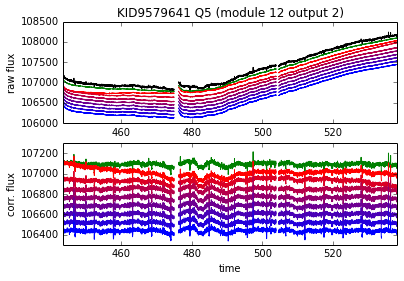

In [2]:
from cbvshrink import cbv
cbv.correct_file('kplr009579641-2010174085026_llc.fits',\
                 'kplr2010174085026-q05-d25_lcbv.fits',\
                 'kplr009579641-2010174085026_llc_cbvshrink.fits',\
                 doplot=True)

The figure above shows, in the top panel, the SAP light curve in black, and below it (with an arbitrary vertical offset for clarity), different versions of the correction. First, the green curve shows the PDC-msMAP correction, for reference. Then in different shades of red to blue we see the correction obtained with CBVshrink using 1, then 2, then 3, ..., then 8 CBVs (the PDC pipeline computes 16 CBVs but never uses more than 8, and we don't recommend doing it either). In the bottom panel are shown the light curves after correction, again using the same colour-coding.

The above function call used the LC file and the CBV file for the relevant quarter as inputs, and produced an output file which is a copy of the original with additional columns added storing the corrected LC using 1, then 2, ..., then 8 CBVs. The output file also has new header keywords storing the weights of the CBVs and the CDPP estimates for the corrected LC, in each case.

## How many CBVs should I use?

Despite the care devoted to avoiding over-fitting, the results depend very slightly on the number of CBVs used. In general, since the CBVs are noisy, you should use the smallest number of CBVs that appears to do a reasonable job, to minimise the noise injected into the corrected light curve. The optimal number to use really depends on the individual light curve, so right now we do not make the decision ourselves, we leave it to the user. 

In the example above, the correction essentially doesn't change after 3 CBVs, so 3 is probably the right number to use. As is the case for _most_ light curves, the corrected LC one ends up with is extremely similar to the PDC-msMAP version. In a small but signficant minority of cases, however, the CBVshrink correction is "better" than the PDC-msMAP, specifically it introduces less high-frequency noise and preserves stellar variability better.

We are working on a "recipe" for automatically selecting the number of CBVs, we have one that worked pretty well on earlier versions of Kepler data, but we haven't fully tested it on the (final) data release 25. As soon as we have done that, we will update the code to include an option to select the number of CBVs used automatically.